In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import seaborn as sns

In [2]:
soh = pd.read_csv(r"C:\Users\DELL\Desktop\Mini project\charge sheet.csv")
soh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Voltage      161 non-null    float64
 1   Current      161 non-null    float64
 2   Temperature  161 non-null    float64
 3   Capacity     161 non-null    float64
dtypes: float64(4)
memory usage: 5.2 KB


In [3]:
a = []
a = round((soh['Capacity']/3)*100)

In [4]:
soh['SOH'] = a

In [5]:
soh.head()

,Voltage,Current,Temperature,Capacity,SOH
0,4.19979,0.08939,23.87099,2.75334,92.0
1,4.19979,0.08429,23.97615,2.75479,92.0
2,4.19979,0.07662,23.87099,2.75613,92.0
3,4.19979,0.07152,23.97615,2.75736,92.0
4,4.19979,0.06641,23.97615,2.75851,92.0


In [6]:
soh.tail()

,Voltage,Current,Temperature,Capacity,SOH
156,4.19979,0.06641,23.45035,2.58431,86.0
157,4.19979,0.06130,23.76583,2.58536,86.0
158,4.19979,0.05619,24.08130,2.58632,86.0
159,4.19979,0.05364,24.08130,2.58723,86.0
160,4.19979,0.04853,23.97615,2.58787,86.0


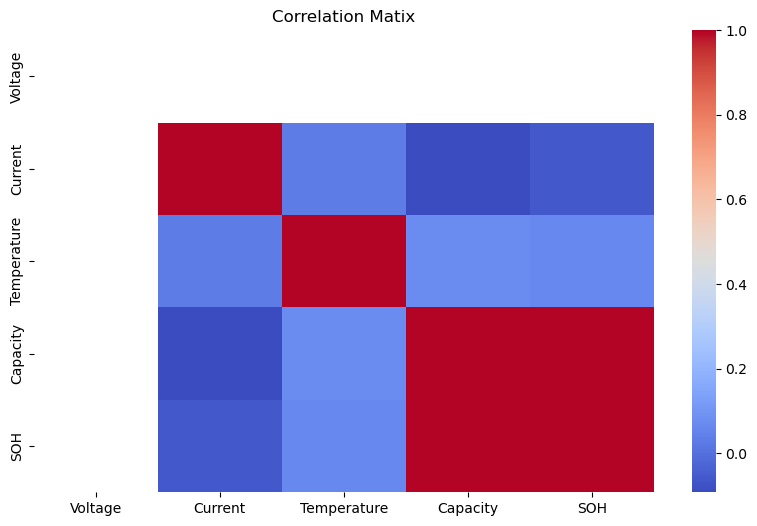

In [7]:
corr_matrix = soh.corr()

fig,ax = plt.subplots(figsize = (10,6))
sns.heatmap(corr_matrix, cmap = 'coolwarm',ax = ax)
ax.set_title("Correlation Matix")

plt.show()

In [8]:
x = soh.iloc[:,:-1]
y = soh.iloc[:,-1]

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [11]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error

In [12]:
model = SVR(kernel='poly',C=30,gamma=0.1)
model.fit(x_train,y_train)
predict = model.predict(x_test)

In [13]:
model.score(x_train,y_train)

0.9808665821881445

In [14]:
r2_score(y_test,predict)

0.9790171795069291

In [15]:
mean_squared_error(y_test,predict)

0.18662956776481618

In [16]:
math.sqrt(mean_squared_error(y_test,predict))

0.4320064441241776

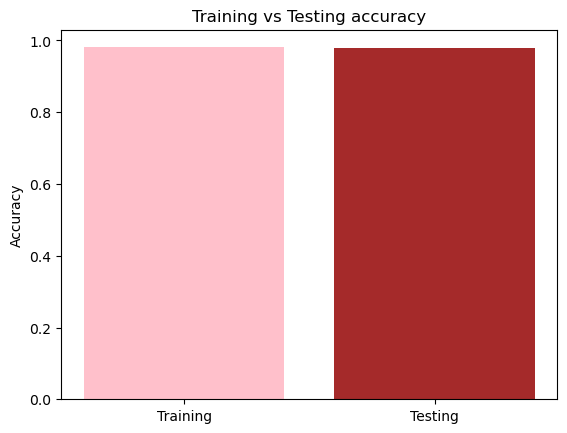

In [17]:
plt.bar(['Training','Testing'],[model.score(x_train,y_train),r2_score(y_test,predict)],color = ['pink','brown'])
plt.title('Training vs Testing accuracy')
plt.ylabel('Accuracy')
plt.show()